# Implement the MNIST dataset using a CNN model

In [1]:
#import the nessasary frameworks and libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets,layers,Model



In [2]:
#Load the dataset
data=datasets.mnist.load_data()
print(data)
(x_train,y_train),(x_test,y_test)=data
print(y_train)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0

In [3]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print(y_train[0])
y_train.shape

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


(60000, 10)

### Create the models by adding Conv2d layers to extract features

In [4]:
input=layers.Input(shape=(28,28,1),batch_size=128)

conv1=layers.Conv2D(32,3,activation='relu',padding='same')(input)
conv2=layers.Conv2D(64,3,activation='relu',padding='same')(conv1)
pool1=layers.MaxPooling2D(pool_size=2)(conv2)

conv3=layers.Conv2D(128,3,activation='relu',padding='same')(pool1)
pool2=layers.MaxPooling2D(pool_size=2)(conv3)

flat=layers.Flatten()(pool2)
dense1=layers.Dense(256,activation='relu')(flat)
dense2=layers.Dense(128,activation='relu')(dense1)
output_layer=layers.Dense(10,activation='softmax')(dense2)

model=Model(inputs=input,outputs=output_layer)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (128, 28, 28, 1)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (128, 28, 28, 32)           │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (128, 28, 28, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (128, 14, 14, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (128, 14, 14, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (128, 7, 7, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (128, 6272)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (128, 256)                  │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (128, 128)                  │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (128, 10)                   │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,732,746 (6.61 MB)

 Trainable params: 1,732,746 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])
best_model=tf.keras.callbacks.ModelCheckpoint('best_model.h5',save_best_only=True)



In [6]:
modelfit_data=model.fit(x_train,y_train,batch_size=128,callbacks=[best_model],epochs=10,validation_split=0.1,verbose=1)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7140 - loss: 31.4147

422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.7144 - loss: 31.3542 - val_accuracy: 0.9717 - val_loss: 0.0948
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9690 - loss: 0.1003

422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9690 - loss: 0.1004 - val_accuracy: 0.9720 - val_loss: 0.0929
Epoch 3/10
419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9735 - loss: 0.0880

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9735 - loss: 0.0880 - val_accuracy: 0.9768 - val_loss: 0.0768
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9765 - loss: 0.0759 - val_accuracy: 0.9753 - val_loss: 0.0924
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9783 - loss: 0.0737 - val_accuracy: 0.9777 - val_loss: 0.0800
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9805 - loss: 0.0613 - val_accuracy: 0.9515 - val_loss: 0.1819
Epoch 7/10
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9751 - loss: 0.0876

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9751 - loss: 0.0875 - val_accuracy: 0.9827 - val_loss: 0.0717
Epoch 8/10
419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9813 - loss: 0.0576

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9813 - loss: 0.0576 - val_accuracy: 0.9833 - val_loss: 0.0681
Epoch 9/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9826 - loss: 0.0584 - val_accuracy: 0.9763 - val_loss: 0.0881
Epoch 10/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9817 - loss: 0.0656 - val_accuracy: 0.9820 - val_loss: 0.0765


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


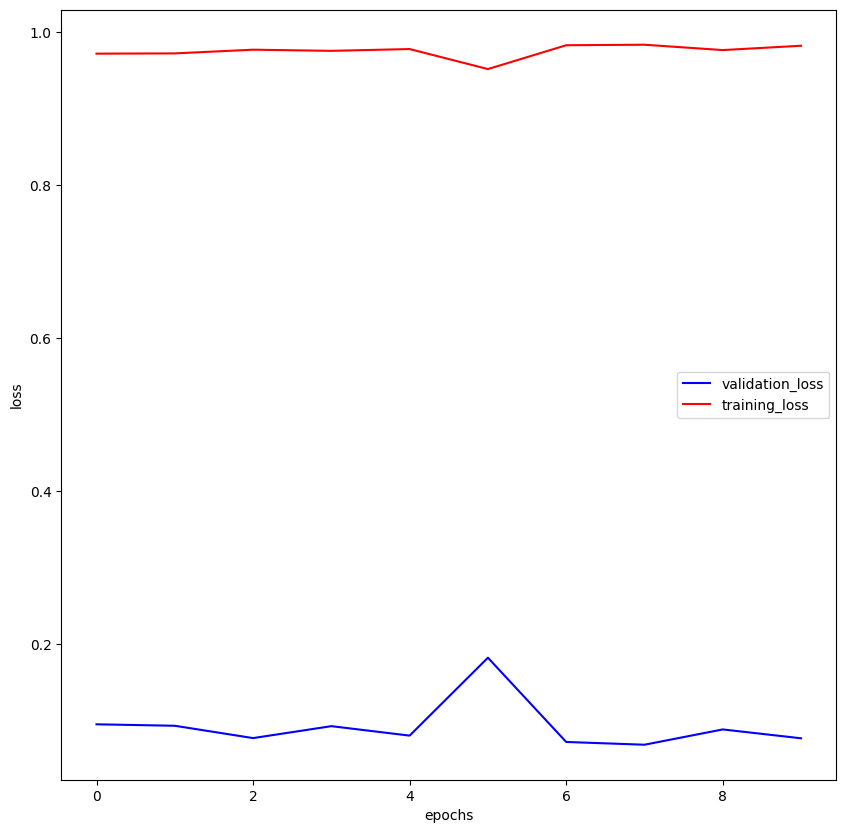

In [7]:
import matplotlib.pyplot as plt
print(modelfit_data.history.keys())
validation_loss=modelfit_data.history['val_loss']
training_loss=modelfit_data.history['val_accuracy']
plt.figure(figsize=(10,10))
plt.plot(validation_loss,label='validation_loss',color='blue')
plt.plot(training_loss,label='training_loss',color='red')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
best_model=tf.keras.models.load_model('best_model.h5')
best_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9757 - loss: 0.0854


[0.07387794554233551, 0.9800999760627747]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


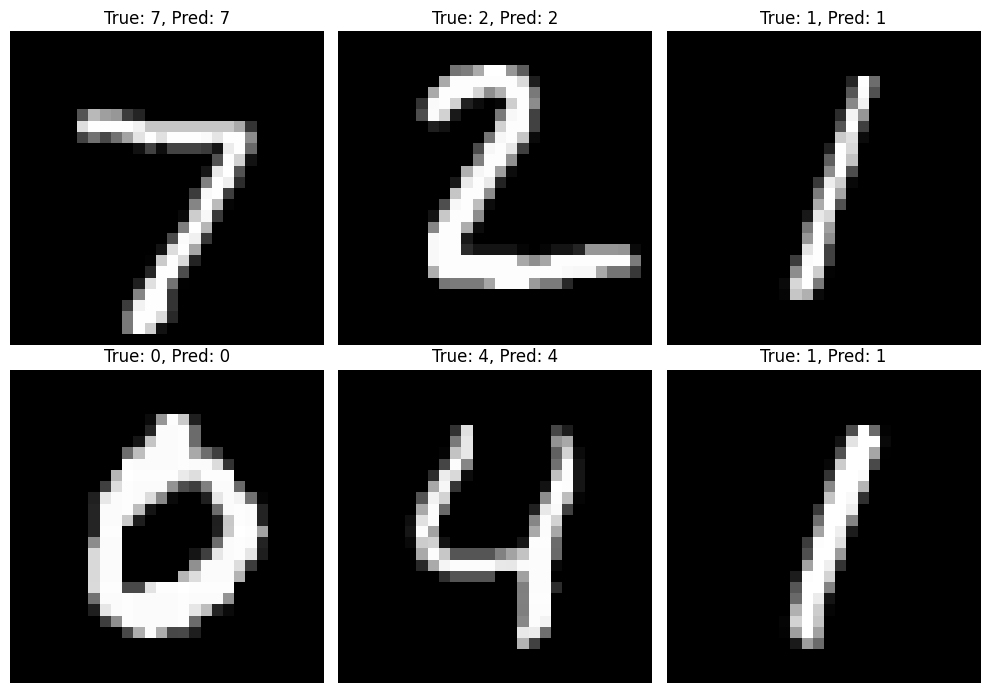

In [12]:

# Make predictions
predictions = best_model.predict(x_test)

# Visualize the results
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
axes = axes.flatten()

for i in range(6):
    img = x_test[i].reshape(28, 28)
    true_label = np.argmax(y_test[i])
    predicted_label = np.argmax(predictions[i])

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"True: {true_label}, Pred: {predicted_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()